In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import DatetimeTickFormatter
from bokeh.transform import dodge
import matplotlib as mpl
from bokeh.palettes import Category10
from bokeh.models import NumeralTickFormatter
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from collections import Counter
from wordcloud import WordCloud


In [392]:
data= pd.read_csv('cleaned_repositories.csv')

In [384]:
display(data)

,id,full_name,url,language,license,topics,owner_type,description,stars_count,forks_count,created_at,updated_at,contributors,languages,month_year
0,637594882,SevaSk/ecoute,https://github.com/SevaSk/ecoute,Python,MIT License,"['gpt-35-turbo', 'whisper-ai', 'windows']",User,Ecoute is a live transcription tool that provi...,4749,603,2023-05-08 02:10:27,2023-07-10 12:28:42,"[{'login': 'SevaSk', 'contributions': 93}, {'l...",{'Python': 100.0},2023-05-08
1,637875777,OpenGVLab/InternGPT,https://github.com/OpenGVLab/InternGPT,Python,Apache License 2.0,"['chatgpt', 'click', 'draggan', 'foundation-mo...",Organization,InternGPT (iGPT) is an open source demo platfo...,2673,192,2023-05-08 15:41:30,2023-07-10 12:14:25,"[{'login': 'liu-zhy', 'contributions': 135}, {...","{'Python': 98.11325416302934, 'Cuda': 1.363244...",2023-05-08
2,637646872,vanjs-org/van,https://github.com/vanjs-org/van,JavaScript,MIT License,"['data-binding', 'dom', 'dom-manipulation', 'g...",Organization,VanJS: World's smallest reactive UI framework ...,1716,37,2023-05-08 05:45:31,2023-07-10 07:17:13,"[{'login': 'Tao-VanJS', 'contributions': 63}, ...","{'JavaScript': 91.9402349865483, 'TypeScript':...",2023-05-08
3,637793209,Physton/sd-webui-prompt-all-in-one,https://github.com/Physton/sd-webui-prompt-all...,Python,MIT License,NO TOPIC,User,"This is an extension based on sd-webui, aimed ...",1139,99,2023-05-08 12:23:21,2023-07-10 09:37:52,"[{'login': 'Physton', 'contributions': 393}, {...","{'Python': 44.1354245354066, 'Less': 24.447449...",2023-05-08
4,637994750,openai/automated-interpretability,https://github.com/openai/automated-interpreta...,Python,NOT INCLUDED,NO TOPIC,Organization,NO DESCRIPTION,683,61,2023-05-08 21:24:11,2023-07-09 17:37:08,"[{'login': 'WuTheFWasThat', 'contributions': 4...","{'Python': 71.24856442756113, 'TypeScript': 10...",2023-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22941,662866146,Foxcapades/renpy-spritesheet-animation-demo,https://github.com/Foxcapades/renpy-spriteshee...,Ren'Py,MIT License,"['animation', 'renpy', 'spritesheet']",User,Demonstration and source for generating animat...,2,0,2023-07-06 04:01:45,2023-07-07 13:27:12,"[{'login': 'Foxcapades', 'contributions': 7}]","{""Ren'Py"": 100.0}",2023-07-06
22942,662809389,canermam2/automatic-octo-telegram,https://github.com/canermam2/automatic-octo-te...,TypeScript,MIT License,NO TOPIC,User,NO DESCRIPTION,2,2,2023-07-06 00:03:07,2023-07-06 01:34:50,"[{'login': 'yangshun', 'contributions': 617}, ...","{'TypeScript': 88.82042950620257, 'JavaScript'...",2023-07-06
22943,662809388,dadletra12/special-giggle,https://github.com/dadletra12/special-giggle,TypeScript,MIT License,NO TOPIC,User,NO DESCRIPTION,2,1,2023-07-06 00:03:07,2023-07-06 01:36:14,"[{'login': 'yangshun', 'contributions': 617}, ...","{'TypeScript': 88.82042950620257, 'JavaScript'...",2023-07-06
22944,662824381,cable8mm/poc-fffast-game,https://github.com/cable8mm/poc-fffast-game,C++,NOT INCLUDED,NO TOPIC,User,This is a repository for creating and reviewin...,2,0,2023-07-06 01:11:51,2023-07-06 02:29:01,"[{'login': 'cable8mm', 'contributions': 2}]","{'C++': 74.82310698067378, 'Objective-C++': 21...",2023-07-06


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22946 entries, 0 to 22945
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            22946 non-null  int64 
 1   full_name     22946 non-null  object
 2   url           22946 non-null  object
 3   language      22946 non-null  object
 4   license       22946 non-null  object
 5   topics        22946 non-null  object
 6   owner_type    22946 non-null  object
 7   description   22946 non-null  object
 8   stars_count   22946 non-null  int64 
 9   forks_count   22946 non-null  int64 
 10  created_at    22946 non-null  object
 11  updated_at    22946 non-null  object
 12  contributors  22946 non-null  object
 13  languages     22946 non-null  object
 14  month_year    22946 non-null  object
dtypes: int64(3), object(12)
memory usage: 2.6+ MB


### Top des dépôts par nombre d'étoiles

In [417]:
# sort the dataframe by stars_count in descending order
sorted_df = data.sort_values(by='stars_count', ascending=False)

# print all the rows in the sorted dataframe
display(sorted_df.head(10))

,id,full_name,url,language,license,topics,owner_type,description,stars_count,forks_count,created_at,updated_at,contributors,languages,month_year
2093,640161038,smol-ai/developer,https://github.com/smol-ai/developer,Python,MIT License,NO TOPIC,Organization,"with 100k context windows on the way, it's now feasible for every dev to have their own smol developer",10199,941,2023-05-13 07:19:57,2023-07-07 15:43:52,"[{'login': 'swyxio', 'contributions': 56}, {'login': 'thatliuser', 'contributions': 7}, {'login': 'cuio', 'contributions': 6}, {'login': 'David-Ademola', 'contributions': 3}, {'login': 'meirm', 'contributions': 3}]",{'Python': 100.0},2023-05-13
2094,640182997,TransformerOptimus/SuperAGI,https://github.com/TransformerOptimus/SuperAGI,Python,MIT License,"['agents', 'agi', 'ai', 'artificial-general-intelligence', 'artificial-intelligence', 'autonomous-agents', 'gpt-4', 'llm', 'llmops', 'nextjs', 'openai', 'pinecone', 'python', 'superagi']",User,"<> SuperAGI - A dev-first open source autonomous AI agent framework. Enabling developers to build, manage & run useful autonomous agents quickly and reliably.",10016,1089,2023-05-13 08:55:24,2023-07-07 16:30:50,"[{'login': 'TransformerOptimus', 'contributions': 334}, {'login': 'NishantBorthakur', 'contributions': 229}, {'login': 'Fluder-Paradyne', 'contributions': 198}, {'login': 'luciferlinx101', 'contributions': 174}, {'login': 'COLONAYUSH', 'contributions': 96}]","{'Python': 71.75269321062024, 'JavaScript': 22.343919987192713, 'CSS': 4.360202532710575, 'Shell': 1.2938161617176718, 'Batchfile': 0.10844123898789736, 'Dockerfile': 0.08133092924092301, 'Mako': 0.059595939529986694}",2023-05-13
1671,640079149,StanGirard/quivr,https://github.com/StanGirard/quivr,TypeScript,Apache License 2.0,"['ai', 'audio', 'chat', 'chatgpt', 'csv', 'embeddings', 'generative', 'gpt', 'gpt4all', 'llm', 'models', 'pdf', 'private', 'privategpt', 'second-brain', 'vectorstore', 'whisper']",User,"Dump all your files and chat with it using your Generative AI Second Brain using LLMs ( GPT 3.5/4, Private, Anthropic, VertexAI ) & Embeddings",9884,1207,2023-05-12 23:53:30,2023-07-07 16:30:47,"[{'login': 'StanGirard', 'contributions': 191}, {'login': 'iMADi-ARCH', 'contributions': 45}, {'login': 'mamadoudicko', 'contributions': 37}, {'login': 'gozineb', 'contributions': 29}, {'login': 'Shaunwei', 'contributions': 16}]","{'TypeScript': 58.66165485946073, 'Python': 34.2152150082287, 'JavaScript': 2.581911605997173, 'PLpgSQL': 2.153339772769118, 'Shell': 1.688793965436659, 'Dockerfile': 0.3523749904399872, 'CSS': 0.31413493922664454, 'Makefile': 0.0325748584409956}",2023-05-12
6671,644715009,PromtEngineer/localGPT,https://github.com/PromtEngineer/localGPT,Python,Apache License 2.0,NO TOPIC,User,Chat with your documents on your local device using GPT models. No data leaves your device and 100% private.,9680,925,2023-05-24 05:32:40,2023-07-07 16:21:55,"[{'login': 'PromtEngineer', 'contributions': 59}, {'login': 'LeafmanZ', 'contributions': 14}, {'login': 'teleprint-me', 'contributions': 10}, {'login': 'Allaye', 'contributions': 9}, {'login': 'AhmedHathout', 'contributions': 7}]","{'Python': 57.31260115133263, 'HTML': 42.687398848667364}",2023-05-24
13090,650945129,facebookresearch/audiocraft,https://github.com/facebookresearch/audiocraft,Python,MIT License,NO TOPIC,Organization,"Audiocraft is a library for audio processing and generation with deep learning. It features the state-of-the-art EnCodec audio compressor / tokenizer, along with MusicGen, a simple and controllable music generation LM with textual and melodic conditioning.",8429,741,2023-06-08 06:41:36,2023-07-07 17:03:08,"[{'login': 'adefossez', 'contributions': 66}, {'login': 'syhw', 'contributions': 3}, {'login': 'ashleykleynhans', 'contributions': 1}, {'login': 'felixkreuk', 'contributions': 1}, {'login': 'jamierpond', 'contributions': 1}]","{'Python': 98.10160558293886, 'Jupyter Notebook': 1.8110646779459019, 'Makefile': 0.087329739115247}",2023-06-08
1235,

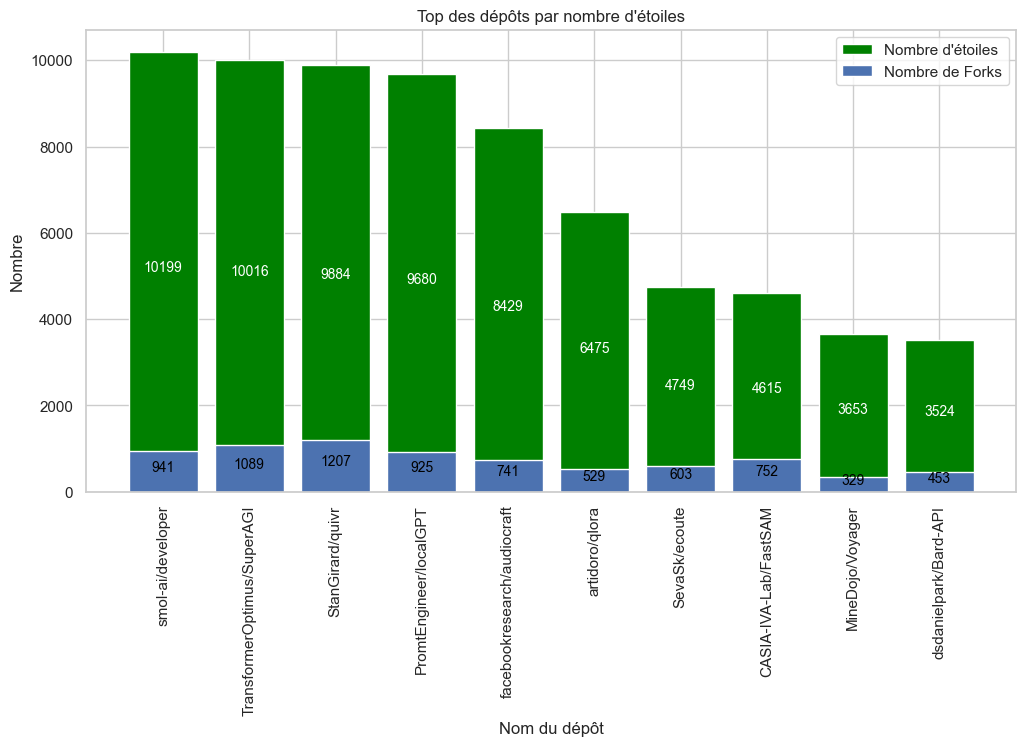

In [387]:

# Créer un diagramme à barres en utilisant Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_repos['full_name'], top_repos['stars_count'], color='green', label='Nombre d\'étoiles')
ax.bar(top_repos['full_name'], top_repos['forks_count'], label='Nombre de Forks')
ax.set_xlabel('Nom du dépôt')
ax.set_ylabel('Nombre')
ax.set_title('Top des dépôts par nombre d\'étoiles')
ax.legend()

# Ajouter des valeurs numérotées à l'intérieur des barres
for i, v in enumerate(top_repos['forks_count']):
    ax.text(i, v/2, str(v), ha='center', fontsize=10, color='black')

# Ajouter des valeurs numérotées à l'intérieur des barres
for i, v in enumerate(top_repos['stars_count']):
    ax.text(i, v/2, str(v), ha='center', fontsize=10, color='white')
    
# Faire pivoter les étiquettes des axes x pour une meilleure lisibilité
plt.xticks(rotation=90)

plt.show()

### Tendances de développement au fil du temps

In [388]:
# Convert the 'created_at' column to datetime
data["created_at"] = pd.to_datetime(data["created_at"])

# Group the data by day and count the number of projects
projects_per_day = data.groupby(data["created_at"].dt.to_period("D")).size()

# Convert the Series to a DataFrame and transpose it
df = pd.DataFrame(projects_per_day).T

# Apply formatting options to the DataFrame
styled_df = df.style.format("{:.0f}") \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
    .background_gradient(cmap='Blues')

# Display the styled DataFrame
styled_df


created_at,2023-05-08,2023-05-09,2023-05-10,2023-05-11,2023-05-12,2023-05-13,2023-05-14,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,2023-05-20,2023-05-21,2023-05-22,2023-05-23,2023-05-24,2023-05-25,2023-05-26,2023-05-27,2023-05-28,2023-05-29,2023-05-30,2023-05-31,2023-06-01,2023-06-02,2023-06-03,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,2023-06-11,2023-06-12,2023-06-13,2023-06-14,2023-06-15,2023-06-16,2023-06-17,2023-06-18,2023-06-19,2023-06-20,2023-06-21,2023-06-22,2023-06-23,2023-06-24,2023-06-25,2023-06-26,2023-06-27,2023-06-28,2023-06-29,2023-06-30,2023-07-01,2023-07-02,2023-07-03,2023-07-04,2023-07-05,2023-07-06
0,433,438,364,436,422,397,415,446,427,435,436,427,363,410,398,424,408,431,425,429,421,427,423,420,432,446,443,435,427,426,426,438,426,438,433,478,331,334,304,381,356,261,284,410,366,354,238,337,316,258,347,287,355,356,348,334,274,305,286,221


In [418]:
projects_per_day

created_at
2023-05-08    433
2023-05-09    438
2023-05-10    364
2023-05-11    436
2023-05-12    422
2023-05-13    397
2023-05-14    415
2023-05-15    446
2023-05-16    427
2023-05-17    435
2023-05-18    436
2023-05-19    427
2023-05-20    363
2023-05-21    410
2023-05-22    398
2023-05-23    424
2023-05-24    408
2023-05-25    431
2023-05-26    425
2023-05-27    429
2023-05-28    421
2023-05-29    427
2023-05-30    423
2023-05-31    420
2023-06-01    432
2023-06-02    446
2023-06-03    443
2023-06-04    435
2023-06-05    427
2023-06-06    426
2023-06-07    426
2023-06-08    438
2023-06-09    426
2023-06-10    438
2023-06-11    433
2023-06-12    478
2023-06-13    331
2023-06-14    334
2023-06-15    304
2023-06-16    381
2023-06-17    356
2023-06-18    261
2023-06-19    284
2023-06-20    410
2023-06-21    366
2023-06-22    354
2023-06-23    238
2023-06-24    337
2023-06-25    316
2023-06-26    258
2023-06-27    347
2023-06-28    287
2023-06-29    355
2023-06-30    356
2023-07-01    348

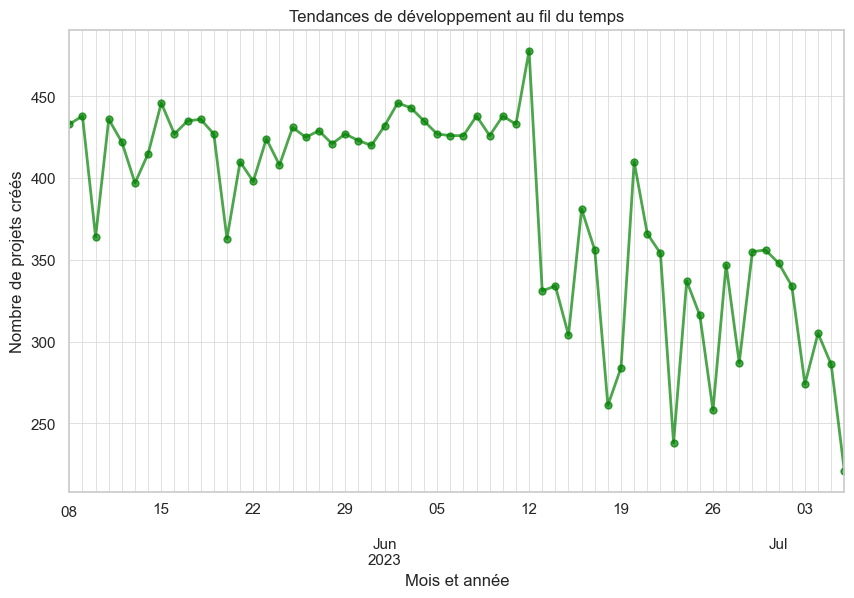

In [389]:
# Group the data by day and count the number of projects
projects_per_day = data.groupby(data["created_at"].dt.to_period("D")).size()

# Set the grid size
mpl.rcParams['axes.grid.axis'] = 'both'
mpl.rcParams['axes.grid.which'] = 'both'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['grid.color'] = 'lightgray'

# Create the line chart
plt.figure(figsize=(10, 6))
projects_per_day.plot(kind="line", marker='o', markersize=5, linewidth=2, alpha=0.7, markerfacecolor='green', color='green')

# Set the x-axis and y-axis labels
plt.xlabel("Mois et année")
plt.ylabel("Nombre de projets créés")

# Set the chart title
plt.title("Tendances de développement au fil du temps")

# Display the chart
plt.show()


### Histogramme des projets créés pour chaque langage au fil du temps

In [421]:
# Select the top 10 languages
top_languages = data['language'].value_counts().head(10)
top_languages

language
Python        6463
JavaScript    3175
TypeScript    2595
HTML           965
Java           964
C++            940
Go             816
C#             740
Rust           709
C              576
Name: count, dtype: int64

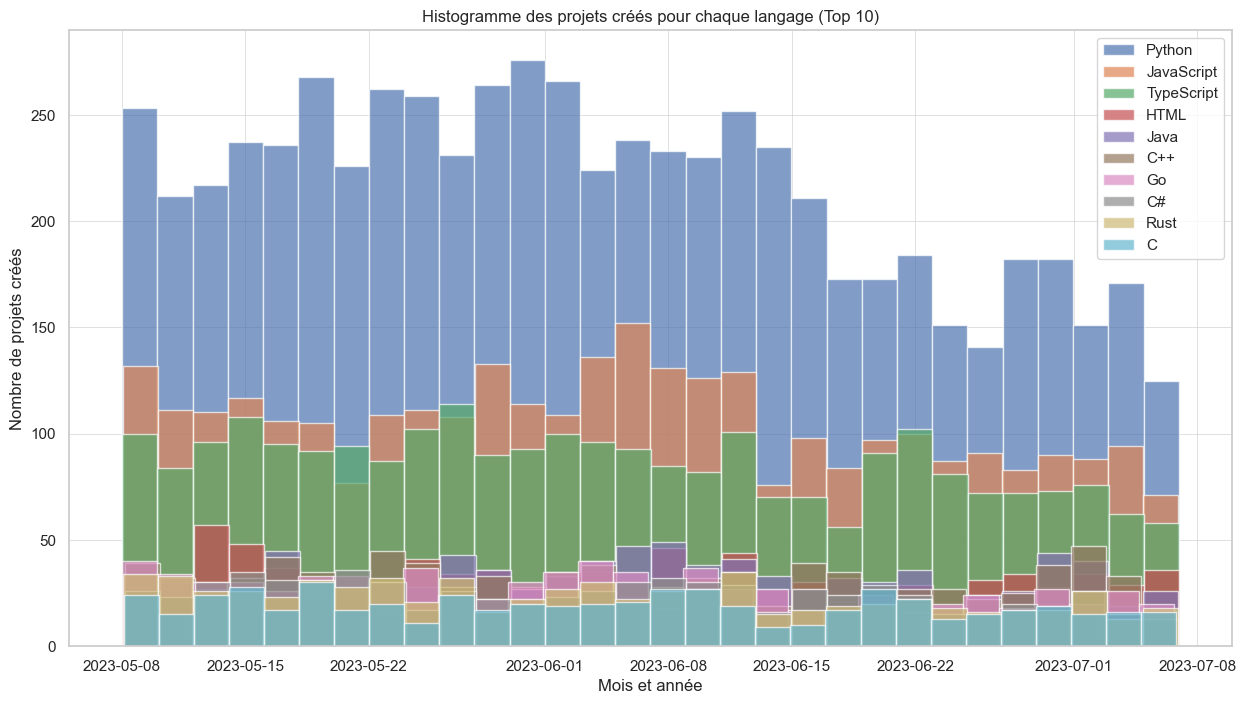

In [408]:
# Filter the data for the top languages
top_languages_data = data[data['language'].isin(top_languages)]

# Create a histogram for each language
plt.figure(figsize=(15, 8))
for language in top_languages:
    language_data = top_languages_data[top_languages_data['language'] == language]
    plt.hist(language_data['created_at'], bins=30, alpha=0.7, label=language)

# Set the x-axis and y-axis labels
plt.xlabel("Mois et année")
plt.ylabel("Nombre de projets créés")

# Set the chart title
plt.title("Histogramme des projets créés pour chaque langage (Top 10)")

# Add a legend
plt.legend()

# Display the chart
plt.show()


### Nombre de projets créés par language

In [423]:
# Group the data by language and count the number of projects
language_counts = data['language'].value_counts()

# Select the top 10 languages
top_languages = language_counts.head(10)
top_languages

language
Python        6463
JavaScript    3175
TypeScript    2595
HTML           965
Java           964
C++            940
Go             816
C#             740
Rust           709
C              576
Name: count, dtype: int64

In [409]:

# Create the figure
p = figure(x_range=top_languages.index.tolist(), height=500, width=770, toolbar_location=None,
           title="Nombre de projets créés par language", background_fill_color="#f9f9f9")

# Set the x-axis labels and orientation
p.xaxis.axis_label = "Language"
p.xaxis.major_label_orientation = 45
p.xaxis.axis_line_color = None
p.xaxis.major_tick_line_color = None
p.xaxis.major_label_text_font_size = "12pt"

# Set the y-axis label
p.yaxis.axis_label = "Nombre de projets créés"
p.yaxis.axis_line_color = None
p.yaxis.major_tick_line_color = None
p.yaxis.major_label_text_font_size = "12pt"
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Set the colors for the bars
colors = Category10[10][:len(top_languages)]

# Create the bar plot
p.vbar(x=top_languages.index.tolist(), top=top_languages.values, width=0.8, fill_color=colors)


# Show the plot
show(p)


### Les 10 principaux contributeurs par Contributions Totales

In [296]:
# Convertir la colonne 'contributors' en une liste de dictionnaires
contributors = data['contributors'].apply(eval)

# Éclater la liste des contributeurs en lignes séparées
contributors = contributors.explode().apply(pd.Series)

# Filtrer les lignes avec "No contributors"
contributors = contributors[contributors['login'] != 'No contributors']

# Regrouper par contributeur et calculer la contribution totale
total_contributions = contributors.groupby('login')['contributions'].sum()

# Sélectionner les 10 principaux contributeurs
top_contributors = total_contributions.nlargest(10)
top_contributors

login
phillipscheryl      17450
tglsfdc             16641
bmomjian            13817
bunnei               7142
00-Evan              6477
upptime-bot          6270
petere               5140
mpdehaan             5101
HopefulHeart2023     4971
bcoca                4333
Name: contributions, dtype: int64

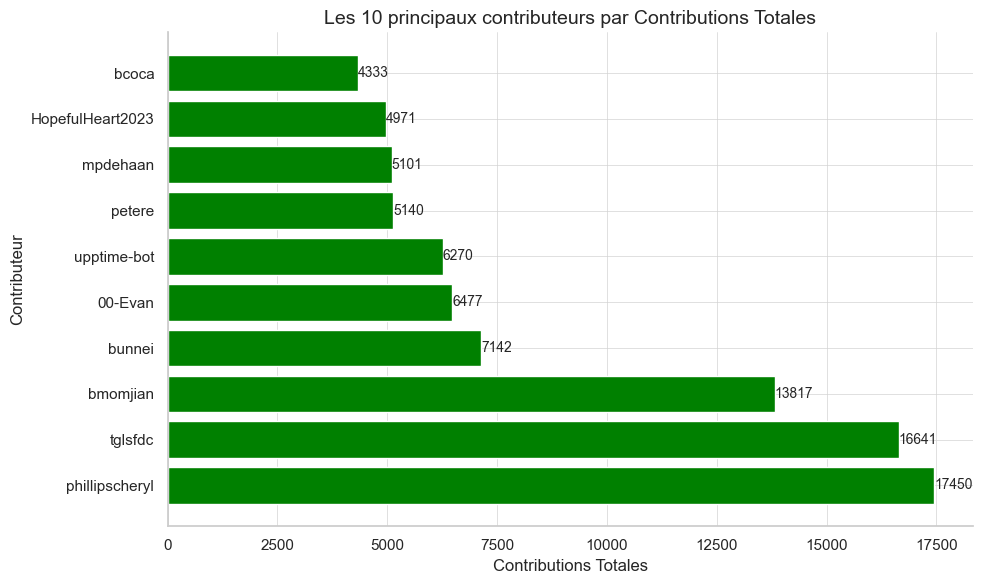

In [297]:
# Create the horizontal bar chart for the top 10 contributors
plt.figure(figsize=(10, 6))
bars = plt.barh(top_contributors.index, top_contributors.values, color='green')

# Add labels to the right of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(width), ha='left', va='center', fontsize=10)

# Hide the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set the labels and title
plt.xlabel('Contributions Totales', fontsize=12)
plt.ylabel('Contributeur', fontsize=12)
plt.title('Les 10 principaux contributeurs par Contributions Totales', fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [213]:
contributor_data = data[data['contributors'].str.contains('phillipscheryl')]
display(contributor_data)

,id,full_name,url,language,license,topics,owner_type,description,stars_count,forks_count,created_at,updated_at,contributors,languages,month_year
548,638600503,phillipscheryl/cascadia_evm_chain,https://github.com/phillipscheryl/cascadia_evm...,Go,Apache License 2.0,NO TOPIC,User,NO DESCRIPTION,14,0,2023-05-09 17:40:06,2023-06-27 18:29:40,"[{'login': 'phillipscheryl', 'contributions': ...","{'Go': 96.44228461013597, 'Shell': 1.482189250...",2023-05-09
579,638599945,phillipscheryl/ethermint,https://github.com/phillipscheryl/ethermint,Go,GNU Lesser General Public License v3.0,NO TOPIC,User,NO DESCRIPTION,11,0,2023-05-09 17:38:44,2023-06-16 02:02:10,"[{'login': 'phillipscheryl', 'contributions': ...","{'Go': 77.37493649402086, 'Solidity': 7.400937...",2023-05-09
587,638599361,phillipscheryl/HumansMarketplace,https://github.com/phillipscheryl/HumansMarket...,Rust,Other,NO TOPIC,User,NO DESCRIPTION,10,0,2023-05-09 17:37:12,2023-06-27 18:29:40,"[{'login': 'phillipscheryl', 'contributions': ...","{'Rust': 80.55485674353598, 'TypeScript': 19.2...",2023-05-09
594,638600360,phillipscheryl/human_marketplace,https://github.com/phillipscheryl/human_market...,Rust,Other,NO TOPIC,User,NO DESCRIPTION,10,0,2023-05-09 17:39:45,2023-06-16 02:02:08,"[{'login': 'phillipscheryl', 'contributions': ...","{'Rust': 76.44858231062209, 'TypeScript': 23.2...",2023-05-09
596,638600714,phillipscheryl/mango-v3-smart-contract,https://github.com/phillipscheryl/mango-v3-sma...,Rust,MIT License,NO TOPIC,User,NO DESCRIPTION,10,0,2023-05-09 17:40:35,2023-06-16 02:02:01,"[{'login': 'phillipscheryl', 'contributions': ...","{'Rust': 99.76029186727877, 'Shell': 0.2397081...",2023-05-09
607,638599237,phillipscheryl/marketplace_on_juno,https://github.com/phillipscheryl/marketplace_...,TypeScript,NOT INCLUDED,NO TOPIC,User,NO DESCRIPTION,9,0,2023-05-09 17:36:54,2023-06-16 02:01:56,"[{'login': 'phillipscheryl', 'contributions': ...","{'TypeScript': 94.74411755532684, 'JavaScript'...",2023-05-09
608,638600686,phillipscheryl/javascript-questions1,https://github.com/phillipscheryl/javascript-q...,JavaScript,NOT INCLUDED,NO TOPIC,User,NO DESCRIPTION,9,0,2023-05-09 17:40:29,2023-06-16 02:02:07,"[{'login': 'phillipscheryl', 'contributions': ...",{'JavaScript': 100.0},2023-05-09
609,638600628,phillipscheryl/humanmarket,https://github.com/phillipscheryl/humanmarket,Rust,Other,NO TOPIC,User,NO DESCRIPTION,9,0,2023-05-09 17:40:21,2023-06-16 02:02:07,"[{'login': 'phillipscheryl', 'contributions': ...","{'Rust': 80.55485674353598, 'TypeScript': 19.2...",2023-05-09
616,638599461,phillipscheryl/HOPE-site,https://github.com/phillipscheryl/HOPE-site,TypeScript,NOT INCLUDED,NO TOPIC,User,NO DESCRIPTION,9,0,2023-05-09 17:37:28,2023-06-16 02:01:56,"[{'login': 'phillipscheryl', 'contributions': ...","{'TypeScript': 63.76344972678795, 'SCSS': 21.0...",2023-05-09
632,638600274,phillipscheryl/avalanche_subnet_faucet,https://github.com/phillipscheryl/avalanche_su...,TypeScript,"BSD 3-Clause ""New"" or ""Revised"" License",NO TOPIC,User,NO DESCRIPTION,8,0,2023-05-09 17:39:32,2023-06-16 02:02:09,"[{'login': 'phillipscheryl', 'contributions': ...","{'TypeScript': 85.93607759405465, 'CSS': 11.68...",2023-05-09


### Les sujets les plus populaires

In [440]:
topics = data['topics'].tolist()

#Filter out 'NO TOPIC' from the list of topics
topics = [topic for topic in topics if topic != 'NO TOPIC']

#Count the occurrences of each topic
topic_counts = Counter(topics)

#Print the topic counts
for topic, count in topic_counts.items():
    print(f"{topic}: {count}")

['gpt-35-turbo', 'whisper-ai', 'windows']: 1
['chatgpt', 'click', 'draggan', 'foundation-model', 'gpt', 'gpt-4', 'gradio', 'husky', 'image-captioning', 'imagebind', 'internimage', 'langchain', 'llama', 'llm', 'multimodal', 'sam', 'segment-anything', 'vicuna', 'video-generation', 'vqa']: 1
['data-binding', 'dom', 'dom-manipulation', 'grab-n-go', 'lightweight', 'lightweight-framework', 'lightweight-javascript-library', 'minimalist', 'no-dependencies', 'no-setup', 'reactive', 'reactive-ui', 'ui-framework', 'ultra-light', 'ultra-thin', 'vanilla-dom-manipulation', 'vanilla-javascript', 'vanilla-js', 'vannilajs']: 1
['alpaca', 'chatgpt', 'chinese-medical', 'disease', 'gpt', 'llama', 'llm', 'medicine']: 1
['cohere', 'huggingface', 'llm', 'openai']: 1
['diff', 'insider', 'nextjs', 'ntoskrnl', 'pdb', 'portable-executable', 'preview', 'reverse-engineering', 'rust', 'syscalls', 'undocumented', 'web', 'win32', 'windows']: 1
['llm', 'llmops']: 1
['3d-reconstruction', '3d-rendering', 'computer-graph

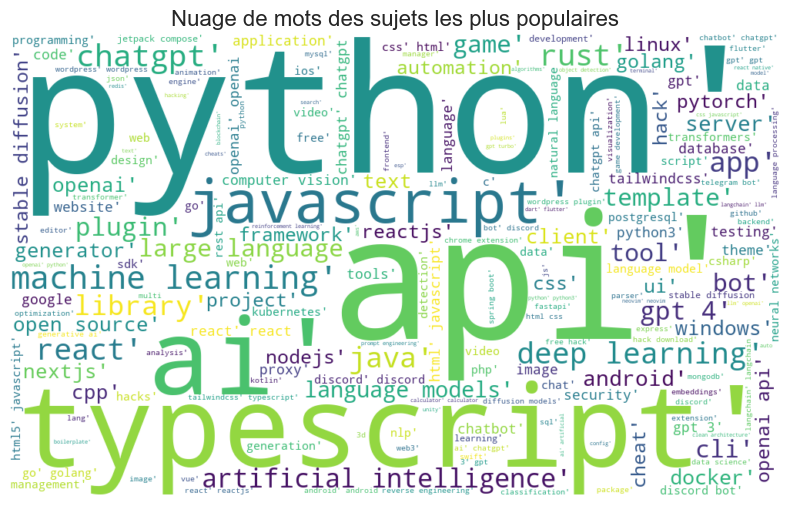

In [425]:

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des sujets les plus populaires', fontsize=16)
plt.show()


### Les licences les plus populaires

In [436]:
licenses = data['license'].tolist()

# Filter out 'NOT INCLUDED' from the list of licenses
licenses = [license for license in licenses if license != 'NOT INCLUDED']

# Count the occurrences of each license
license_counts = Counter(licenses)

# Print the license counts
for license, count in license_counts.items():
    print(f"{license}: {count}")


MIT License: 6516
Apache License 2.0: 1702
BSD 3-Clause "New" or "Revised" License: 169
GNU General Public License v3.0: 1220
Creative Commons Zero v1.0 Universal: 94
Other: 673
The Unlicense: 99
GNU Affero General Public License v3.0: 306
GNU General Public License v2.0: 124
Mozilla Public License 2.0: 73
ISC License: 22
MIT No Attribution: 39
Boost Software License 1.0: 11
GNU Lesser General Public License v3.0: 37
Creative Commons Attribution 4.0 International: 29
BSD 2-Clause "Simplified" License: 40
Universal Permissive License v1.0: 5
GNU Lesser General Public License v2.1: 26
Do What The F*ck You Want To Public License: 20
zlib License: 14
Creative Commons Attribution Share Alike 4.0 International: 16
Eclipse Public License 2.0: 7
Mulan Permissive Software License, Version 2: 5
European Union Public License 1.2: 5
LaTeX Project Public License v1.3c: 2
BSD Zero Clause License: 4
Open Software License 3.0: 3
Artistic License 2.0: 2
Open Data Commons Open Database License v1.0: 1
E

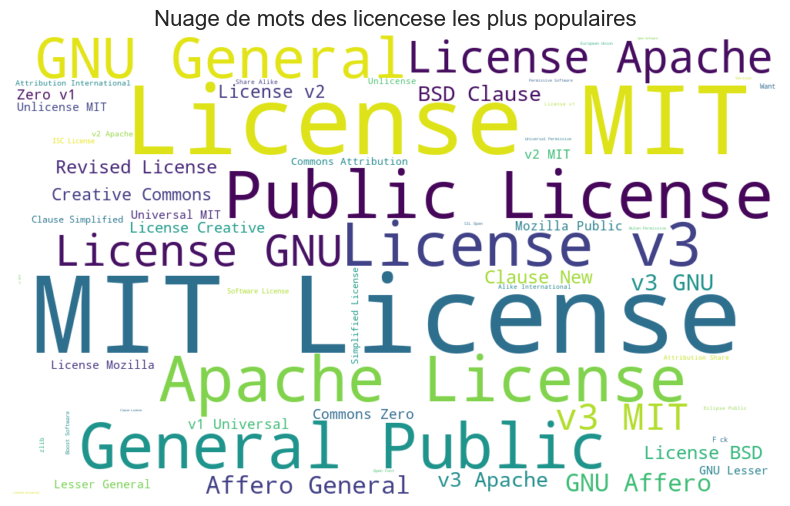

In [426]:
# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des licencese les plus populaires', fontsize=16)
plt.show()

### Répartition des types de propriétaires

In [433]:
# Replace 'data' with your actual DataFrame
grouped = data['owner_type'].value_counts()

# Calculate the total count of repositories
total_repos = grouped.sum()

# Calculate the percentage for each owner type
percentage = (grouped / total_repos) * 100

# Create the text output
output = "\n".join([f"{owner_type}: {percentage:.1f}%" for owner_type, percentage in zip(grouped.index, percentage)])

# Display the output
print("Owner Type Distribution:")
print(output)


Owner Type Distribution:
User: 82.1%
Organization: 17.9%


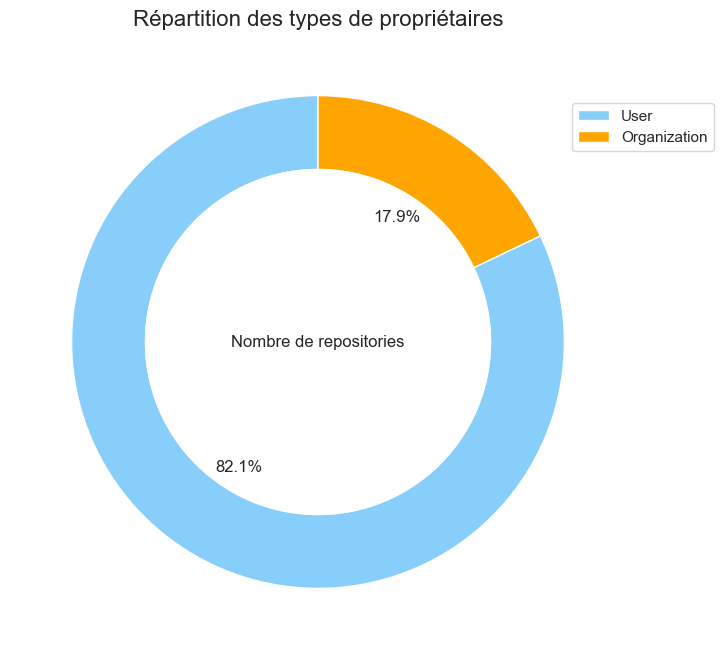

In [435]:
# Define colors for each slice
colors = ['lightskyblue', 'orange']

# Define labels for each slice
labels = grouped.index

# Create the outer ring pie chart
fig, ax = plt.subplots(figsize=(8, 8))
outer = ax.pie(grouped, colors=colors, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%', startangle=90)

# Create the inner hole pie chart
inner = ax.pie([1], colors=['white'], radius=0.7)

# Add labels to the outer ring pie chart
plt.legend(outer[0], labels, loc="best", bbox_to_anchor=(0.9, 0.9))

# Add a title to the chart
ax.set_title('Répartition des types de propriétaires', fontsize=16)

# Add a subtitle to the chart
ax.text(0, 0, 'Nombre de repositories', ha='center', va='center', fontsize=12)

plt.show()
